##Importing Libraries



In [17]:
!pip install ultralytics
from ultralytics import YOLO
from ultralytics import YOLO
import math
import cv2
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
!pip install torchsummary
!pip install pytorch_model_summary
from torchsummary import summary

In [2]:
!cd /content

## Training and Testing Data

In [2]:
!yolo task=detect mode=train model=yolov8l.pt data='/content/drive/MyDrive/cnst/data.yaml' epochs=10

100% 83.7M/83.7M [00:00<00:00, 408MB/s]
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/cnst/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

##Video Writer Creation Function


In [3]:
import cv2
from google.colab.patches import cv2_imshow

def create_video_writer(video_cap, output_filename):

    # grab the width, height, and fps of the frames in the video stream.
    frame_width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video_cap.get(cv2.CAP_PROP_FPS))

    # initialize the FourCC and a video writer object
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    writer = cv2.VideoWriter(output_filename, fourcc, fps,
                             (frame_width, frame_height))

    return writer

## Defining Parameters and Results


0: 384x640 3 Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 3 Persons, 41.8ms
Speed: 1.6ms preprocess, 41.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Hardhat
Hardhat
Hardhat
Person
NO-Safety Vest
Person
NO-Mask
NO-Mask
Person
NO-Safety Vest


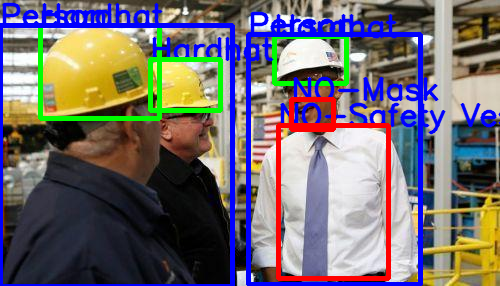

In [9]:

# Load the image
img = cv2.imread("/content/drive/MyDrive/cnst/test/images/004763_jpg.rf.c8f1bd1cb7cf6037f7c90a6c213d6364.jpg")

# Initialize the YOLO model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Class names
classNames = ['Excavator', 'Gloves', 'Hardhat', 'Ladder', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest',
              'Person', 'SUV', 'Safety Cone', 'Safety Vest', 'bus', 'dump truck', 'fire hydrant', 'machinery',
              'mini-van', 'sedan', 'semi', 'trailer', 'truck and trailer', 'truck', 'van', 'vehicle', 'wheel loader']

# Color for bounding boxes
myColor = (0, 0, 255)

# Run the model on the image
results = model(img)

# Process the results
for r in results:
    boxes = r.boxes
    for box in boxes:
        # Bounding Box
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Confidence
        conf = math.ceil((box.conf[0] * 100)) / 100

        # Class Name
        cls = int(box.cls[0])
        currentClass = classNames[cls]
        print(currentClass)

        if conf > 0.5:
            if currentClass == 'NO-Hardhat' or currentClass == 'NO-Safety Vest' or currentClass == "NO-Mask":
                myColor = (0, 0, 255)
            elif currentClass == 'Hardhat' or currentClass == 'Safety Vest' or currentClass == "Mask":
                myColor = (0, 255, 0)
            else:
                myColor = (255, 0, 0)

            img = cv2.putText(img, f'{classNames[cls]}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX,
                              1, (255, 0, 0), 2, cv2.LINE_AA)
            cv2.rectangle(img, (x1, y1), (x2, y2), myColor, 3)

# Display the image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


#Loading Image


In [5]:
#cap = cv2.VideoCapture('/content/drive/MyDrive/cnst/videos/ppe-3.mp4')
#writer = create_video_writer(cap, "ConstructionSiteSafetyOutput.mp4")
model = YOLO("/content/drive/MyDrive/cnst/weights/best.pt")
img=model('/content/drive/MyDrive/cnst/test/images/004063_jpg.rf.6ecc587c20a87ec176841aea39b8f5db.jpg',show=True,save=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/drive/MyDrive/cnst/test/images/004063_jpg.rf.6ecc587c20a87ec176841aea39b8f5db.jpg: 448x640 4 Hardhats, 1 NO-Hardhat, 4 NO-Safety Vests, 5 Persons, 1 Safety Vest, 67.3ms
Speed: 3.0ms preprocess, 67.3ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
